<a href="https://colab.research.google.com/github/sudo0809/Credit-Risk-Prediction/blob/main/Credit_risk_pred_UnivAI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook avalilable at : https://github.com/sudo0809/Credit-Risk-Prediction





## Importing Stuff

In [1]:
pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sudo0809/Credit-Risk-Prediction/main/Training%20Data.csv")
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.drop("Id", axis=1, inplace=True)
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               252000 non-null  int64 
 1   age                  252000 non-null  int64 
 2   experience           252000 non-null  int64 
 3   married              252000 non-null  object
 4   house_ownership      252000 non-null  object
 5   car_ownership        252000 non-null  object
 6   profession           252000 non-null  object
 7   city                 252000 non-null  object
 8   state                252000 non-null  object
 9   current_job_years    252000 non-null  int64 
 10  current_house_years  252000 non-null  int64 
 11  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


(             income            age  ...  current_house_years      risk_flag
 count  2.520000e+05  252000.000000  ...        252000.000000  252000.000000
 mean   4.997117e+06      49.954071  ...            11.997794       0.123000
 std    2.878311e+06      17.063863  ...             1.399037       0.328438
 min    1.031000e+04      21.000000  ...            10.000000       0.000000
 25%    2.503015e+06      35.000000  ...            11.000000       0.000000
 50%    5.000694e+06      50.000000  ...            12.000000       0.000000
 75%    7.477502e+06      65.000000  ...            13.000000       0.000000
 max    9.999938e+06      79.000000  ...            14.000000       1.000000
 
 [8 rows x 6 columns], None)

In [6]:
df.isnull().values.any()

False

In [7]:
df.shape

(252000, 12)

In [8]:
print(f"count of risk flag = 1 is {df[df['risk_flag']==1].shape[0]} i.e {(df[df['risk_flag']==1].shape[0]/df.shape[0])*100} % of total data")
print(f"count of risk flag = 0 is {df[df['risk_flag']==0].shape[0]} i.e {(df[df['risk_flag']==0].shape[0]/df.shape[0])*100} % of total data")

count of risk flag = 1 is 30996 i.e 12.3 % of total data
count of risk flag = 0 is 221004 i.e 87.7 % of total data


## Taking only balanced Data
### 50% risk flag = 1 and 50% risk_flag = 0

In [9]:
risk_high_data = df[df['risk_flag']==1]
risk_low_data = df[df['risk_flag']==0]

m_low = min(len(risk_high_data), len(risk_low_data))

balanced_data = pd.concat([risk_high_data[:m_low], risk_low_data[:m_low]]).sample(frac=1)
print(f"Balanced Data shape = {balanced_data.shape}")
print(f"count of risk flag = 1 is {balanced_data[balanced_data['risk_flag']==1].shape[0]}")
print(f"count of risk flag = 0 is {balanced_data[balanced_data['risk_flag']==0].shape[0]}")

Balanced Data shape = (61992, 12)
count of risk flag = 1 is 30996
count of risk flag = 0 is 30996


In [10]:
cols = list(df.columns)
cols

['income',
 'age',
 'experience',
 'married',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state',
 'current_job_years',
 'current_house_years',
 'risk_flag']

In [11]:
my_dict = {}
for col_name in cols:
  if len(balanced_data[col_name].unique())<60:
    print(col_name, " = ", balanced_data[col_name].unique())
    print()
  else:
    print(f"{col_name} = {len(balanced_data[col_name].unique())} unique values")
    print()
  my_dict[col_name] = balanced_data[col_name].unique()

income = 13251 unique values

age  =  [39 55 63 66 60 28 25 70 37 77 27 57 42 69 58 32 65 24 54 56 41 29 33 48
 45 31 61 35 74 38 53 75 64 23 40 30 79 76 67 73 51 43 78 52 22 71 36 68
 47 59 50 49 34 44 21 72 46 62 26]

experience  =  [14 18  2  9 15  3  7  5  1 16 10  6 12 20 13  8  0  4 17 19 11]

married  =  ['single' 'married']

house_ownership  =  ['rented' 'owned' 'norent_noown']

car_ownership  =  ['yes' 'no']

profession  =  ['Army_officer' 'Software_Developer' 'Civil_engineer' 'Hotel_Manager'
 'Air_traffic_controller' 'Firefighter' 'Technical_writer'
 'Industrial_Engineer' 'Computer_hardware_engineer' 'Statistician'
 'Librarian' 'Petroleum_Engineer' 'Engineer' 'Biomedical_Engineer'
 'Graphic_Designer' 'Web_designer' 'Geologist' 'Chartered_Accountant'
 'Scientist' 'Financial_Analyst' 'Analyst' 'Surveyor' 'Police_officer'
 'Lawyer' 'Flight_attendant' 'Official' 'Aviator' 'Designer'
 'Psychologist' 'Computer_operator' 'Dentist' 'Physician' 'Artist'
 'Drafter' 'Consultant' 'Techno

In [12]:
print(my_dict['age'])

[39 55 63 66 60 28 25 70 37 77 27 57 42 69 58 32 65 24 54 56 41 29 33 48
 45 31 61 35 74 38 53 75 64 23 40 30 79 76 67 73 51 43 78 52 22 71 36 68
 47 59 50 49 34 44 21 72 46 62 26]


In [13]:
my_dict['experience'].sort()

In [14]:
my_dict['experience']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Some Graphial Representation
Very few though

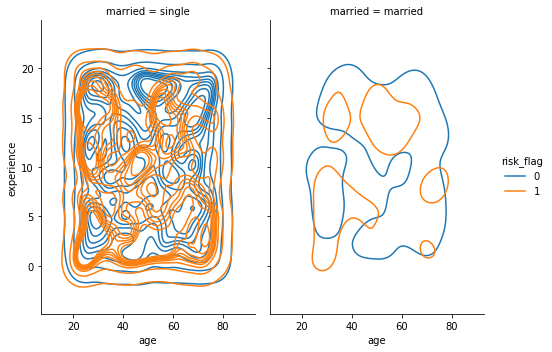

In [15]:
sns.displot(y='experience', x='age' , data=balanced_data ,hue='risk_flag', col='married' ,kind='kde', height=5, aspect=0.7)

[]

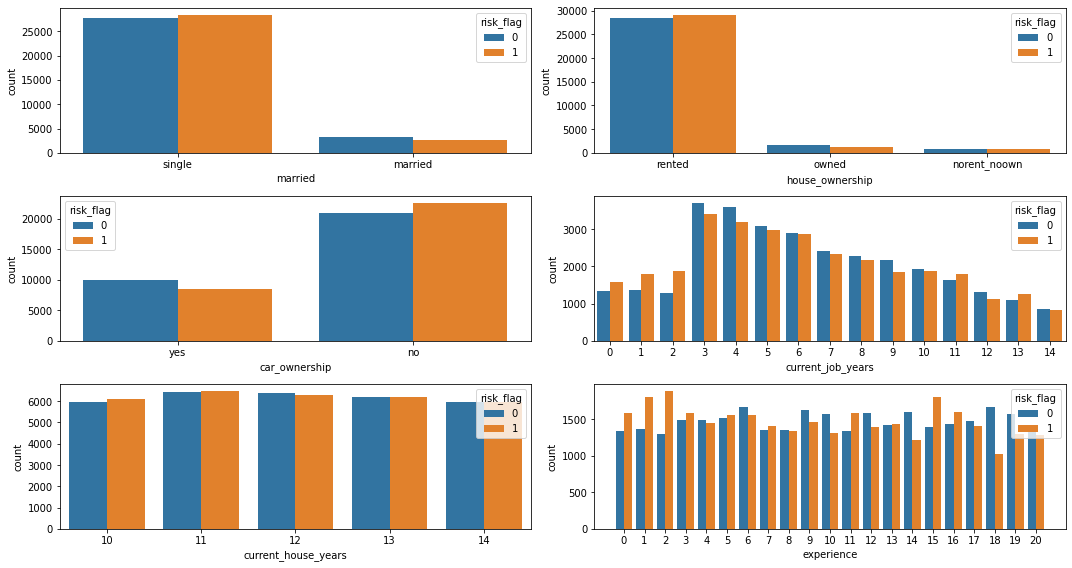

In [16]:
features = ['married', 'house_ownership','car_ownership', 'current_job_years','current_house_years', 'experience']

plt.figure(figsize=(15,8))
for i,feature in enumerate(features):
  plt.subplot(len(features)/2, 2, i+1)
  sns.countplot(x=feature, data=balanced_data, hue='risk_flag')
plt.tight_layout()
plt.plot()

## Encoding the Categorical Data

In [17]:
married_le = preprocessing.LabelEncoder()
married_le.fit(balanced_data['married'].unique())
print(married_le.classes_)
balanced_data['married'] = married_le.transform(balanced_data["married"])
balanced_data['married'].unique()

['married' 'single']


array([1, 0])

In [18]:
car_le = preprocessing.LabelEncoder()
car_le.fit(balanced_data['car_ownership'].unique())
print(car_le.classes_)
balanced_data['car_ownership'] = car_le.transform(balanced_data['car_ownership'])
balanced_data['car_ownership'].unique()

['no' 'yes']


array([1, 0])

In [19]:
house_le = preprocessing.LabelEncoder()
house_le.fit(balanced_data['house_ownership'].unique())
print(house_le.classes_)
balanced_data['house_ownership'] = house_le.transform(balanced_data['house_ownership'])
balanced_data['house_ownership'].unique()

['norent_noown' 'owned' 'rented']


array([2, 1, 0])

In [20]:
# hash_enc = ce.hashing.HashingEncoder(cols='profession' , max_process=4)
# # hash_enc.fit(balanced_data['profession'])

# data1 = hash_enc.fit_transform(balanced_data)
# print(hash_enc.get_feature_names())

binary_enc = ce.BinaryEncoder(cols=['profession', 'state'])
data1 = binary_enc.fit_transform(balanced_data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
data1.head(10)

,income,age,experience,married,house_ownership,car_ownership,profession_0,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,city,state_0,state_1,state_2,state_3,state_4,state_5,current_job_years,current_house_years,risk_flag
14227,1548035,39,14,1,2,1,0,0,0,0,0,0,1,Tadepalligudem,0,0,0,0,0,1,4,13,0
26133,8064081,55,18,1,2,1,0,0,0,0,0,1,0,Bhiwani,0,0,0,0,1,0,9,14,0
242803,7444966,39,2,1,2,0,0,0,0,0,0,1,1,Udupi,0,0,0,0,1,1,2,11,1
80320,7256900,55,9,1,2,0,0,0,0,0,1,0,0,Indore,0,0,0,1,0,0,4,14,1
208171,5842579,63,15,1,2,0,0,0,0,0,1,0,1,Bongaigaon,0,0,0,1,0,1,14,13,1
111461,2935149,66,2,1,2,0,0,0,0,0,1,1,0,Imphal,0,0,0,1,1,0,2,10,1
29673,2687545,60,3,1,2,1,0,0,0,0,1,1,1,Mango,0,0,0,1,1,1,3,11,0
67311,1872336,28,3,1,2,1,0,0,0,1,0,0,0,Satna,0,0,0,1,0,0,3,12,1
183706,1312362,25,7,0,2,0,0,0,0,1,0,0,1,Parbhani,0,0,1,0,0,0,7,13,1
247702,1983548,70,5,1,2,0,0,0,0,1,0,1,0,Burhanpur,0,0,0,1,0,0,5,13,1


In [22]:
df_final = data1.drop(labels=['city'], axis=1)

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61992 entries, 14227 to 5500
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               61992 non-null  int64
 1   age                  61992 non-null  int64
 2   experience           61992 non-null  int64
 3   married              61992 non-null  int64
 4   house_ownership      61992 non-null  int64
 5   car_ownership        61992 non-null  int64
 6   profession_0         61992 non-null  int64
 7   profession_1         61992 non-null  int64
 8   profession_2         61992 non-null  int64
 9   profession_3         61992 non-null  int64
 10  profession_4         61992 non-null  int64
 11  profession_5         61992 non-null  int64
 12  profession_6         61992 non-null  int64
 13  state_0              61992 non-null  int64
 14  state_1              61992 non-null  int64
 15  state_2              61992 non-null  int64
 16  state_3            

In [24]:
df_final.head()

,income,age,experience,married,house_ownership,car_ownership,profession_0,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,state_0,state_1,state_2,state_3,state_4,state_5,current_job_years,current_house_years,risk_flag
14227,1548035,39,14,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,4,13,0
26133,8064081,55,18,1,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,9,14,0
242803,7444966,39,2,1,2,0,0,0,0,0,0,1,1,0,0,0,0,1,1,2,11,1
80320,7256900,55,9,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4,14,1
208171,5842579,63,15,1,2,0,0,0,0,0,1,0,1,0,0,0,1,0,1,14,13,1


In [25]:
np.unique(df_final['profession_0'].values), np.unique(df_final['state_0'].values)

(array([0]), array([0]))

In [26]:
df_final.drop(['profession_0', 'state_0'], axis=1, inplace=True)

In [27]:
scaler = preprocessing.MinMaxScaler()

In [28]:
scaler.fit(df_final)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
scaler.data_max_ , scaler.data_min_

(array([9.99918e+06, 7.90000e+01, 2.00000e+01, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.40000e+01, 1.40000e+01, 1.00000e+00]),
 array([1.031e+04, 2.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+01, 0.000e+00]))

In [30]:
data2 = pd.DataFrame(scaler.transform(df_final))

In [32]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.153944,0.310345,0.70,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.75,0.0
1,0.806274,0.586207,0.90,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.642857,1.00,0.0
2,0.744294,0.310345,0.10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.142857,0.25,1.0
3,0.725466,0.586207,0.45,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.285714,1.00,1.0
4,0.583877,0.724138,0.75,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.000000,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61987,0.495511,0.603448,0.55,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.357143,0.50,1.0
61988,0.878603,0.362069,0.25,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.50,0.0
61989,0.970585,0.224138,0.45,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.571429,1.00,0.0
61990,0.976933,0.775862,0.05,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.071429,0.75,1.0


[]

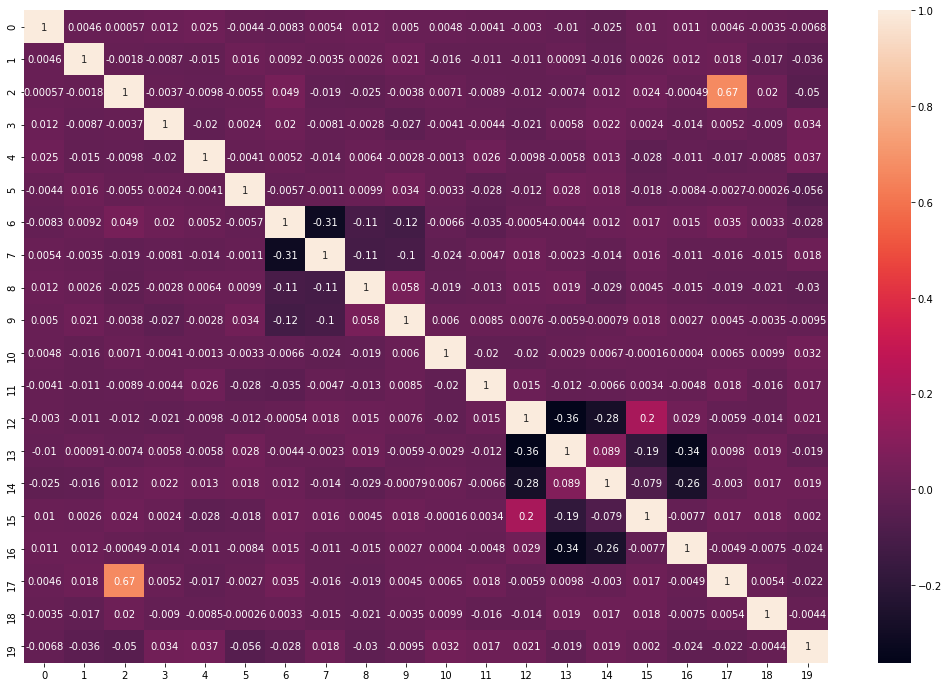

In [122]:
plt.figure(figsize=(18,12)) 
sns.heatmap(data2.corr(), annot=True, fmt='.2g',)
plt.plot()

In [34]:
train_ratio = 0.8
train_m = int(train_ratio * data2.shape[0])

Train = data2[:train_m]
Test = data2[train_m:]

In [35]:
X_train = Train.iloc[:, :-1]
y_train = Train.iloc[:, -1]
X_test = Test.iloc[:, :-1]
y_test = Test.iloc[:, -1]

print(f"shape of X train is {X_train.shape}")
print(f"shape of y train is {y_train.shape}")
print(f"shape of X test is {X_test.shape}")
print(f"shape of y test is {y_test.shape}")

shape of X train is (49593, 19)
shape of y train is (49593,)
shape of X test is (12399, 19)
shape of y test is (12399,)


# Learning From Different Classifier

## Using Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lr.intercept_

0.46982297181932364

In [40]:
pred_lr = lr.predict(X_test)

In [41]:
pred_lr.shape

(12399,)

In [42]:
np.unique(pred_lr)

array([0.27269417, 0.27945514, 0.28424517, ..., 0.66475349, 0.6670198 ,
       0.67421849])

In [43]:
for i in range(len(pred_lr)):
  if pred_lr[i]<0.5:
    pred_lr[i] = 0
  else:
    pred_lr[i] = 1

In [44]:
print(metrics.classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54      6193
         1.0       0.55      0.57      0.56      6206

    accuracy                           0.55     12399
   macro avg       0.55      0.55      0.55     12399
weighted avg       0.55      0.55      0.55     12399



In [45]:
import collections
collections.Counter(pred_lr)

Counter({0.0: 5900, 1.0: 6499})

In [46]:
collections.Counter(y_test)

Counter({0.0: 6193, 1.0: 6206})

In [47]:
print("MAE:", metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))

MAE: 0.45043955157674004
MSE: 0.45043955157674004
RMSE: 0.6711479356868648


## Using Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

In [50]:
np.unique(y_pred)

array([0., 1.])

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54      6193
         1.0       0.55      0.57      0.56      6206

    accuracy                           0.55     12399
   macro avg       0.55      0.55      0.55     12399
weighted avg       0.55      0.55      0.55     12399



In [52]:
print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))

roc_auc_score:  0.5499388584379389
f1 score:  0.5606299212598426


In [53]:
len(y_test[y_test==1])

6206

## Using SVM

In [54]:
from sklearn import svm

In [55]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
pred_svm = SVM.predict(X_test)

In [56]:
np.unique(pred_svm)

array([0., 1.])

In [57]:
collections.Counter(pred_svm)

Counter({0.0: 5900, 1.0: 6499})

In [58]:
print("MAE:", metrics.mean_absolute_error(y_test, pred_svm))
print('MSE:', metrics.mean_squared_error(y_test, pred_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_svm)))

MAE: 0.45043955157674004
MSE: 0.45043955157674004
RMSE: 0.6711479356868648


In [59]:
roc_auc_score(y_test, pred_svm)

0.549535176861966

## Using Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=80, random_state=0)
RF.fit(X_train, y_train)
pred_re = RF.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred_re))
print(classification_report(y_test,pred_re))
print(accuracy_score(y_test, pred_re))

[[5668  525]
 [ 705 5501]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      6193
         1.0       0.91      0.89      0.90      6206

    accuracy                           0.90     12399
   macro avg       0.90      0.90      0.90     12399
weighted avg       0.90      0.90      0.90     12399

0.9007984514880232


## Using Neural Network to Classify

In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
model = Sequential()

model.add(Dense(units = 20, activation = 'relu', input_shape=(X_train.shape[1], )))

model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=10, verbose=1)

Epoch 1/20
4960/4960 [==============================] - 8s 1ms/step - loss: 0.6930 - accuracy: 0.5057 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 2/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6930 - accuracy: 0.5074 - val_loss: 0.6925 - val_accuracy: 0.5005
Epoch 3/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6928 - accuracy: 0.5086 - val_loss: 0.6925 - val_accuracy: 0.5193
Epoch 4/20
4960/4960 [==============================] - 7s 2ms/step - loss: 0.6922 - accuracy: 0.5164 - val_loss: 0.6915 - val_accuracy: 0.5253
Epoch 5/20
4960/4960 [==============================] - 7s 1ms/step - loss: 0.6915 - accuracy: 0.5236 - val_loss: 0.6902 - val_accuracy: 0.5350
Epoch 6/20
4960/4960 [==============================] - 8s 2ms/step - loss: 0.6902 - accuracy: 0.5317 - val_loss: 0.6873 - val_accuracy: 0.5512
Epoch 7/20
4960/4960 [==============================] - 8s 2ms/step - loss: 0.6874 - accuracy: 0.5457 - val_loss: 0.6844 - val_accuracy:

In [65]:
# history.history

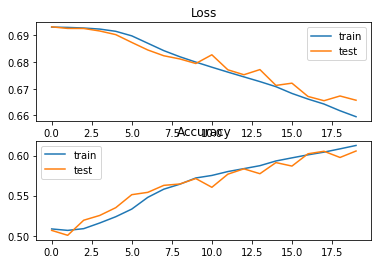

In [66]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [67]:
pred_nn = model.predict(X_test, batch_size=1, verbose=1)

12399/12399 [==============================] - 9s 742us/step


In [68]:
for i in range(len(pred_nn)):
  if pred_nn[i]<0.5:
    pred_nn[i]=0
  else:
    pred_nn[i]=1

np.unique(pred_nn)

array([0., 1.], dtype=float32)

In [69]:
accuracy_score(y_test, pred_nn)

0.6056133559157997

## Using Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [71]:
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [72]:
print(confusion_matrix(y_test,pred_nb))
print(classification_report(y_test,pred_nb, target_names=['risk flag 0', 'risk flag 1'] ))
print(accuracy_score(y_test, pred_nb))

[[2269 3924]
 [1793 4413]]
              precision    recall  f1-score   support

 risk flag 0       0.56      0.37      0.44      6193
 risk flag 1       0.53      0.71      0.61      6206

    accuracy                           0.54     12399
   macro avg       0.54      0.54      0.52     12399
weighted avg       0.54      0.54      0.52     12399

0.5389144285829502


In [73]:
pred_nb

array([1., 0., 1., ..., 0., 1., 0.])

In [74]:
print("Roc_auc_score:", metrics.roc_auc_score(y_test, pred_nb))

Roc_auc_score: 0.5387337220575723


## Using Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [76]:
print(classification_report(y_test,pred_dtree, target_names=['risk flag 0', 'risk flag 1'] ))
print("Accuacy score", accuracy_score(y_test, pred_dtree))
print("Roc_auc_score:", metrics.roc_auc_score(y_test, pred_dtree))

              precision    recall  f1-score   support

 risk flag 0       0.91      0.91      0.91      6193
 risk flag 1       0.91      0.91      0.91      6206

    accuracy                           0.91     12399
   macro avg       0.91      0.91      0.91     12399
weighted avg       0.91      0.91      0.91     12399

Accuacy score 0.9126542463101863
Roc_auc_score: 0.9126555878298448


# Conculsion of Classifier Algorithms

In [77]:
comparison_matrix = {'Linear Regression': [accuracy_score(y_test, pred_lr), f1_score(y_test, pred_lr), roc_auc_score(y_test, pred_lr)],
                     'Logistic Regression': [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)],
                     'SVM classifier': [accuracy_score(y_test, pred_svm), f1_score(y_test, pred_svm), roc_auc_score(y_test, pred_svm)],
                     'Naive Bayes': [accuracy_score(y_test, pred_nb), f1_score(y_test, pred_nb), roc_auc_score(y_test, pred_nb)],
                     'Random Forest': [accuracy_score(y_test, pred_re), f1_score(y_test, pred_re), roc_auc_score(y_test, pred_re)],
                     'Decison Tree': [accuracy_score(y_test, pred_dtree), f1_score(y_test, pred_dtree), roc_auc_score(y_test, pred_dtree)],
                     'Neural Network': [accuracy_score(y_test, pred_nn), f1_score(y_test, pred_nn), roc_auc_score(y_test, pred_nn)]}

com_matrix = pd.DataFrame(comparison_matrix).transpose()
com_matrix.reset_index(inplace=True)

In [78]:
com_matrix.columns = ['Classification Algorithm','Accuracy Score', 'F1 Score', 'Roc Auc Score']
com_matrix.set_index('Classification Algorithm',inplace=True)
com_matrix

,Accuracy Score,F1 Score,Roc Auc Score
Classification Algorithm,,,
Linear Regression,0.549560,0.560409,0.549535
Logistic Regression,0.549964,0.560630,0.549939
SVM classifier,0.549560,0.560409,0.549535
Naive Bayes,0.538914,0.606890,0.538734
Random Forest,0.900798,0.899444,0.900814
Decison Tree,0.912654,0.912626,0.912656
Neural Network,0.605613,0.529174,0.605784


# Prediction on the Test File for submission

## Modeling Best Classifier from all the Training data available

In [79]:
train_full = data2.sample(frac=1)
train_X_full = train_full.iloc[:, :-1]
train_y_full = train_full.iloc[:, -1]

print("shape of train X full :",train_X_full.shape)
print("shape of train y full :",train_y_full.shape)

shape of train X full : (61992, 19)
shape of train y full : (61992,)


In [80]:
train_X_full.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
28878,0.438393,0.362069,1.00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.785714,0.00
37919,0.406631,0.310345,0.45,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.642857,1.00
10075,0.722095,0.896552,0.00,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.25
19623,0.042166,0.517241,0.50,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.714286,0.25
51668,0.042166,0.517241,0.50,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.714286,0.25


In [81]:
# np.unique(train_X_full[6].values), np.unique(train_X_full[13].values)

In [82]:
# train_X_full.drop([6,13], axis=1, inplace=True)

In [83]:
train_X_full.shape

(61992, 19)

In [84]:
#using DecisionTree as it is showing the best results
dtc = DecisionTreeClassifier()
dtc.fit(train_X_full, train_y_full) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
#using Random Forest Tree as it is also have a potential score
rf_algo = RandomForestClassifier()
rf_algo.fit(train_X_full, train_y_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Using Classifiers on the Test File

In [86]:
test_file_url = "https://raw.githubusercontent.com/sudo0809/Credit-Risk-Prediction/main/Test%20Data.csv"
test_df = pd.read_csv(test_file_url,)
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [87]:
test_data = test_df.drop(['id', 'city',], axis=1)

In [88]:
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,state,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,Geologist,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,West Bengal,13,11


In [89]:
test_data['married'] = married_le.transform(test_data['married'])
test_data['house_ownership'] = house_le.transform(test_data['house_ownership'])
test_data['car_ownership'] = car_le.transform(test_data['car_ownership'])
# test_data = hash_enc.fit_transform(test_data)
test_data = binary_enc.fit_transform(test_data)
test_data.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,income,age,experience,married,house_ownership,car_ownership,profession_0,profession_1,profession_2,profession_3,profession_4,profession_5,profession_6,state_0,state_1,state_2,state_3,state_4,state_5,current_job_years,current_house_years
0,7393090,59,19,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4,13
1,1215004,25,5,1,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,5,10
2,8901342,50,12,1,2,0,0,0,0,0,0,1,1,0,0,0,0,1,0,9,14
3,1944421,49,9,0,2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,3,12
4,13429,25,18,1,2,1,0,0,0,0,1,0,1,0,0,0,0,0,1,13,11


In [90]:
test_data.drop(labels=['profession_0', 'state_0'], axis=1, inplace=True)

In [91]:
np.unique(test_data['state_4'].values)

array([0, 1])

In [92]:
test_X = pd.DataFrame(scaler.fit_transform(test_data))

In [93]:
display(test_X.head())
test_X.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.739054,0.655172,0.95,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.75
1,0.120596,0.068966,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.357143,0.00
2,0.890037,0.500000,0.60,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.642857,1.00
3,0.193614,0.482759,0.45,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214286,0.50
4,0.000312,0.068966,0.90,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.928571,0.25


(28000, 19)

### This Decision tree classifier is trained using 80% of balanced training data


In [94]:
pred_test_y_dtree = dtree.predict(test_X)

In [95]:
collections.Counter(pred_test_y_dtree)

Counter({0.0: 13190, 1.0: 14810})

### This Decision tree classifier is trained on full balanced training data


In [96]:
pred_test_y_dtc = dtc.predict(test_X)
collections.Counter(pred_test_y_dtc)

Counter({0.0: 11819, 1.0: 16181})

In [97]:
submission = pd.DataFrame({
        "id": test_df['id'],
        "risk_flag": pred_y.astype('int')
    })
submission.to_csv('submission2.csv', index=False)

### Predicting using Random Forest 

In [121]:
##using Random forest
pred_test_y_rf = rf_algo.predict(test_X)

collections.Counter(pred_test_y_rf)

Counter({0.0: 10847, 1.0: 17153})

In [117]:
submission = pd.DataFrame({
        "id": test_df['id'],
        "risk_flag": pred_y.astype('int')
    })
submission.to_csv('submission3_rf.csv', index=False)

### Predict using Neural Network Model

In [119]:
pred_test_y_nn = model.predict(test_X)

for i in range(len(pred_test_y_nn)):
  if pred_test_y_nn[i]<0.5:
    pred_test_y_nn[i]=0
  else:
    pred_test_y_nn[i]=1

np.unique(pred_test_y_nn, return_counts=True)

(array([0., 1.], dtype=float32), array([20702,  7298]))

## The First submission which has nearly 86.7% accuracy
- profession, state, city columns wew dropped in this model
- used Decision Tree classifier for prediction

In [120]:
sub1 = pd.read_csv('submission1.csv')

collections.Counter(sub1['risk_flag'])

Counter({0: 21262, 1: 6738})